# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import openweathermapy.core as owm
import csv

# Import API key
from api_keys_Martel4 import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)




## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



cities_df = pd.DataFrame(cities)
cities_df.columns = ['cities']
cities_df



,cities
0,qaanaaq
1,torbay
2,pevek
3,lompoc
4,port alfred
5,castro
6,hilo
7,playa del carmen
8,saleaula
9,victoria


In [6]:
#Loop Through Dataframe

# base url

row_count = cities_df.count()
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="



# list for response results
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
MaxTemp = []
WindSpeed = []



# use iterrows to iterate through pandas dataframe
for index, row in cities_df.iterrows():
    
   
    row_count = 0
    

    # get city names from df
    city_name = row['cities']

    # assemble url and make API request
    print(f"Retrieving Results for Index {index}: {city_name}.")
    response = requests.get(query_url + city_name).json()
  
    
    time.sleep(1)
    
    try:
        print(f"Processing record {city_name}.")
        print(response)
        City.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        MaxTemp.append(response['main']['temp_max'])
        WindSpeed.append(response['wind']['speed'])

      
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    print("------------")
       
  
 


Retrieving Results for Index 0: qaanaaq.
Processing record qaanaaq.
{'coord': {'lon': -69.36, 'lat': 77.48}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 1.64, 'pressure': 997.55, 'humidity': 100, 'temp_min': 1.64, 'temp_max': 1.64, 'sea_level': 1031.48, 'grnd_level': 997.55}, 'wind': {'speed': 9.26, 'deg': 112.006}, 'clouds': {'all': 0}, 'dt': 1541272466, 'sys': {'message': 0.0036, 'country': 'GL', 'sunrise': 0, 'sunset': 0}, 'id': 3831208, 'name': 'Qaanaaq', 'cod': 200}
------------
Retrieving Results for Index 1: torbay.
Processing record torbay.
{'coord': {'lon': -52.73, 'lat': 47.66}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}, {'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 42.8, 'pressure': 1021, 'humidity': 100, 'temp_min': 42.8, 'temp_max': 42.8}, 'visibility': 402, 'wind': {'speed': 12.75, 'deg': 130}, 'c

Processing record punta arenas.
{'coord': {'lon': -70.91, 'lat': -53.16}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 51.8, 'pressure': 982, 'humidity': 66, 'temp_min': 51.8, 'temp_max': 51.8}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 50}, 'clouds': {'all': 0}, 'dt': 1541268000, 'sys': {'type': 1, 'id': 4642, 'message': 0.0036, 'country': 'CL', 'sunrise': 1541235302, 'sunset': 1541289630}, 'id': 3874787, 'name': 'Punta Arenas', 'cod': 200}
------------
Retrieving Results for Index 16: rikitea.
Processing record rikitea.
{'coord': {'lon': -134.97, 'lat': -23.12}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 74.05, 'pressure': 1033.06, 'humidity': 98, 'temp_min': 74.05, 'temp_max': 74.05, 'sea_level': 1033.18, 'grnd_level': 1033.06}, 'wind': {'speed': 18.66, 'deg': 60.5058}, 'rain': {'3h': 2.435}, 'clouds': {'all': 76}, '

Processing record jamestown.
{'coord': {'lon': 138.6, 'lat': -33.21}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 56.5, 'pressure': 971.05, 'humidity': 75, 'temp_min': 56.5, 'temp_max': 56.5, 'sea_level': 1029.86, 'grnd_level': 971.05}, 'wind': {'speed': 7.4, 'deg': 13.0058}, 'rain': {'3h': 0.5525}, 'clouds': {'all': 100}, 'dt': 1541272509, 'sys': {'message': 0.0034, 'country': 'AU', 'sunrise': 1541187841, 'sunset': 1541236482}, 'id': 2069194, 'name': 'Jamestown', 'cod': 200}
------------
Retrieving Results for Index 31: hasaki.
Processing record hasaki.
{'coord': {'lon': 140.83, 'lat': 35.73}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 51.71, 'pressure': 1023, 'humidity': 93, 'temp_min': 50, 'temp_max': 53.6}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 320}, 'clouds': {'all': 20}, 'dt': 1541271600, 'sys': {'type': 1, '

Processing record hobart.
{'coord': {'lon': 147.33, 'lat': -42.88}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 53.6, 'pressure': 1006, 'humidity': 58, 'temp_min': 53.6, 'temp_max': 53.6}, 'visibility': 10000, 'wind': {'speed': 18.34, 'deg': 330}, 'clouds': {'all': 75}, 'dt': 1541269800, 'sys': {'type': 1, 'id': 8195, 'message': 0.0035, 'country': 'AU', 'sunrise': 1541184662, 'sunset': 1541235486}, 'id': 2163355, 'name': 'Hobart', 'cod': 200}
------------
Retrieving Results for Index 46: tuktoyaktuk.
Processing record tuktoyaktuk.
{'coord': {'lon': -133.03, 'lat': 69.44}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 3.2, 'pressure': 1013, 'humidity': 84, 'temp_min': 3.2, 'temp_max': 3.2}, 'visibility': 24140, 'wind': {'speed': 9.17, 'deg': 140}, 'clouds': {'all': 20}, 'dt': 1541268000, 'sys': {'type': 1, 'id': 3555, 'message

Processing record yaring.
{'coord': {'lon': 101.37, 'lat': 6.87}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.53, 'pressure': 1016.85, 'humidity': 96, 'temp_min': 75.53, 'temp_max': 75.53, 'sea_level': 1024.95, 'grnd_level': 1016.85}, 'wind': {'speed': 4.23, 'deg': 64.0058}, 'clouds': {'all': 92}, 'dt': 1541272551, 'sys': {'message': 0.0039, 'country': 'TH', 'sunrise': 1541199724, 'sunset': 1541242436}, 'id': 1604771, 'name': 'Yaring', 'cod': 200}
------------
Retrieving Results for Index 63: sistranda.
Processing record sistranda.
{'coord': {'lon': 8.83, 'lat': 63.73}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 42.8, 'pressure': 1008, 'humidity': 81, 'temp_min': 42.8, 'temp_max': 42.8}, 'visibility': 10000, 'wind': {'speed': 24.16, 'deg': 130}, 'clouds': {'all': 90}, 'dt': 1541271000, 'sys': {'type': 1, 'id': 5316, 'me

Processing record san patricio.
{'coord': {'lon': -56.83, 'lat': -26.98}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 70.13, 'pressure': 1012.14, 'humidity': 100, 'temp_min': 70.13, 'temp_max': 70.13, 'sea_level': 1022.12, 'grnd_level': 1012.14}, 'wind': {'speed': 3.89, 'deg': 106.006}, 'rain': {'3h': 13.6025}, 'clouds': {'all': 100}, 'dt': 1541272569, 'sys': {'message': 0.0197, 'country': 'PY', 'sunrise': 1541235288, 'sunset': 1541282835}, 'id': 3437029, 'name': 'San Patricio', 'cod': 200}
------------
Retrieving Results for Index 78: esso.
Processing record esso.
{'coord': {'lon': 158.7, 'lat': 55.93}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 13.79, 'pressure': 886.58, 'humidity': 75, 'temp_min': 13.79, 'temp_max': 13.79, 'sea_level': 1011.9, 'grnd_level': 886.58}, 'wind': {'speed': 2.71, 'deg': 163.006}, 'cl

Processing record nome.
{'coord': {'lon': -94.42, 'lat': 30.04}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 76.24, 'pressure': 1017, 'humidity': 45, 'temp_min': 74.84, 'temp_max': 77.72}, 'visibility': 16093, 'wind': {'speed': 14.99, 'deg': 170, 'gust': 10.8}, 'clouds': {'all': 75}, 'dt': 1541271300, 'sys': {'type': 1, 'id': 2561, 'message': 0.0034, 'country': 'US', 'sunrise': 1541248427, 'sunset': 1541287696}, 'id': 4732862, 'name': 'Nome', 'cod': 200}
------------
Retrieving Results for Index 93: souillac.
Processing record souillac.
{'coord': {'lon': -0.6, 'lat': 45.6}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 46.22, 'pressure': 1021, 'humidity': 81, 'temp_min': 44.6, 'temp_max': 48.2}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 80}, 'clouds': {'all': 0}, 'dt': 1541271600, 'sys': {'type': 1, 'id': 5528, 'messag

Processing record sola.
{'coord': {'lon': 5.65, 'lat': 58.89}, 'weather': [{'id': 310, 'main': 'Drizzle', 'description': 'light intensity drizzle rain', 'icon': '09n'}, {'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 50, 'pressure': 1015, 'humidity': 93, 'temp_min': 50, 'temp_max': 50}, 'visibility': 5000, 'wind': {'speed': 19.46, 'deg': 160}, 'clouds': {'all': 75}, 'dt': 1541271000, 'sys': {'type': 1, 'id': 5343, 'message': 0.0035, 'country': 'NO', 'sunrise': 1541228484, 'sunset': 1541259573}, 'id': 3137942, 'name': 'Sola', 'cod': 200}
------------
Retrieving Results for Index 108: barentsburg.
Processing record barentsburg.
{'cod': '404', 'message': 'city not found'}
Missing field/result... skipping.
------------
Retrieving Results for Index 109: victoria point.
Processing record victoria point.
{'coord': {'lon': 153.3, 'lat': -27.58}, 'weather': [{'id'

Processing record champerico.
{'coord': {'lon': -93.6, 'lat': 16.38}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 84.2, 'pressure': 1015, 'humidity': 58, 'temp_min': 84.2, 'temp_max': 84.2}, 'visibility': 12874, 'wind': {'speed': 3.36, 'deg': 150}, 'clouds': {'all': 40}, 'dt': 1541266800, 'sys': {'type': 1, 'id': 4025, 'message': 0.0032, 'country': 'MX', 'sunrise': 1541247171, 'sunset': 1541288568}, 'id': 3530097, 'name': 'Champerico', 'cod': 200}
------------
Retrieving Results for Index 124: hami.
Processing record hami.
{'coord': {'lon': 93.51, 'lat': 42.84}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 23.33, 'pressure': 961.48, 'humidity': 65, 'temp_min': 23.33, 'temp_max': 23.33, 'sea_level': 1048.42, 'grnd_level': 961.48}, 'wind': {'speed': 6.13, 'deg': 105.506}, 'clouds': {'all': 0}, 'dt': 1541272626, 'sys': {'messa

Processing record orlik.
{'coord': {'lon': 99.83, 'lat': 52.51}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 11, 'pressure': 809.57, 'humidity': 62, 'temp_min': 11, 'temp_max': 11, 'sea_level': 1040.72, 'grnd_level': 809.57}, 'wind': {'speed': 4.38, 'deg': 256.006}, 'clouds': {'all': 68}, 'dt': 1541272643, 'sys': {'message': 0.067, 'country': 'RU', 'sunrise': 1541204478, 'sunset': 1541238382}, 'id': 1496073, 'name': 'Orlik', 'cod': 200}
------------
Retrieving Results for Index 139: fort nelson.
Processing record fort nelson.
{'coord': {'lon': -122.69, 'lat': 58.81}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 14, 'pressure': 1013, 'humidity': 92, 'temp_min': 14, 'temp_max': 14}, 'visibility': 32186, 'wind': {'speed': 2.24, 'deg': 20}, 'clouds': {'all': 75}, 'dt': 1541271600, 'sys': {'type': 1, 'id': 3278, 'message': 0.0

Processing record tilichiki.
{'coord': {'lon': 166.1, 'lat': 60.47}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 13.16, 'pressure': 994.39, 'humidity': 92, 'temp_min': 13.16, 'temp_max': 13.16, 'sea_level': 1014.42, 'grnd_level': 994.39}, 'wind': {'speed': 3.78, 'deg': 5.0058}, 'clouds': {'all': 88}, 'dt': 1541272662, 'sys': {'message': 0.0034, 'country': 'RU', 'sunrise': 1541190339, 'sunset': 1541220699}, 'id': 2120591, 'name': 'Tilichiki', 'cod': 200}
------------
Retrieving Results for Index 155: cidreira.
Processing record cidreira.
{'coord': {'lon': -50.22, 'lat': -30.17}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 71.8, 'pressure': 1013.04, 'humidity': 93, 'temp_min': 71.8, 'temp_max': 71.8, 'sea_level': 1022.93, 'grnd_level': 1013.04}, 'wind': {'speed': 10.04, 'deg': 174.006}, 'clouds': {'all': 88}, 'dt': 154

Processing record otradnoye.
{'coord': {'lon': 30.8, 'lat': 59.77}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 46.4, 'pressure': 1018, 'humidity': 93, 'temp_min': 46.4, 'temp_max': 46.4}, 'visibility': 10000, 'wind': {'speed': 11.18, 'deg': 250, 'gust': 10}, 'clouds': {'all': 90}, 'dt': 1541269800, 'sys': {'type': 1, 'id': 7267, 'message': 0.0038, 'country': 'RU', 'sunrise': 1541222673, 'sunset': 1541253311}, 'id': 513898, 'name': 'Otradnoye', 'cod': 200}
------------
Retrieving Results for Index 170: tomatlan.
Processing record tomatlan.
{'coord': {'lon': -105.25, 'lat': 19.93}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 80.03, 'pressure': 988.8, 'humidity': 74, 'temp_min': 80.03, 'temp_max': 80.03, 'sea_level': 1026.05, 'grnd_level': 988.8}, 'wind': {'speed': 3.22, 'deg': 235.506}, 'clouds': {'all': 92}

Processing record halifax.
{'coord': {'lon': -63.58, 'lat': 44.65}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 66.2, 'pressure': 1008, 'humidity': 93, 'temp_min': 66.2, 'temp_max': 66.2}, 'visibility': 16093, 'wind': {'speed': 24.16, 'deg': 200, 'gust': 15.4}, 'clouds': {'all': 90}, 'dt': 1541271600, 'sys': {'type': 1, 'id': 3488, 'message': 0.0257, 'country': 'CA', 'sunrise': 1541242548, 'sunset': 1541278759}, 'id': 6324729, 'name': 'Halifax', 'cod': 200}
------------
Retrieving Results for Index 186: mayor pablo lagerenza.
Processing record mayor pablo lagerenza.
{'coord': {'lon': -60.77, 'lat': -19.93}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 92.54, 'pressure': 995.69, 'humidity': 57, 'temp_min': 92.54, 'temp_max': 92.54, 'sea_level': 1016, 'grnd_level': 995.69}, 'wind': {'speed': 20.6, 'deg': 327.006}, 'clouds

Processing record sao filipe.
{'coord': {'lon': -24.5, 'lat': 14.9}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 80.57, 'pressure': 1013.93, 'humidity': 88, 'temp_min': 80.57, 'temp_max': 80.57, 'sea_level': 1025.56, 'grnd_level': 1013.93}, 'wind': {'speed': 15.79, 'deg': 51.0058}, 'clouds': {'all': 20}, 'dt': 1541272722, 'sys': {'message': 0.0029, 'country': 'CV', 'sunrise': 1541230479, 'sunset': 1541272093}, 'id': 3374210, 'name': 'Sao Filipe', 'cod': 200}
------------
Retrieving Results for Index 202: batagay-alyta.
Processing record batagay-alyta.
{'coord': {'lon': 130.41, 'lat': 67.8}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -26.71, 'pressure': 933.43, 'humidity': 0, 'temp_min': -26.71, 'temp_max': -26.71, 'sea_level': 1030.1, 'grnd_level': 933.43}, 'wind': {'speed': 2.82, 'deg': 282.506}, 'clouds': {'all': 12}, 'dt':

Processing record el tocuyo.
{'coord': {'lon': -69.8, 'lat': 9.79}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 82.4, 'pressure': 1014, 'humidity': 58, 'temp_min': 82.4, 'temp_max': 82.4}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 70}, 'clouds': {'all': 40}, 'dt': 1541268000, 'sys': {'type': 1, 'id': 4291, 'message': 0.0036, 'country': 'VE', 'sunrise': 1541241004, 'sunset': 1541283315}, 'id': 3641275, 'name': 'El Tocuyo', 'cod': 200}
------------
Retrieving Results for Index 218: baruun-urt.
Processing record baruun-urt.
{'coord': {'lon': 113.28, 'lat': 46.68}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 2.36, 'pressure': 921.28, 'humidity': 52, 'temp_min': 2.36, 'temp_max': 2.36, 'sea_level': 1052.35, 'grnd_level': 921.28}, 'wind': {'speed': 3.04, 'deg': 136.506}, 'clouds': {'all': 20}, 'dt': 1541272742, 'sys':

Processing record mae sai.
{'coord': {'lon': 99.89, 'lat': 20.44}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 62.6, 'pressure': 1016, 'humidity': 100, 'temp_min': 62.6, 'temp_max': 62.6}, 'visibility': 6000, 'wind': {'speed': 1.21, 'deg': 269.506}, 'clouds': {'all': 0}, 'dt': 1541271600, 'sys': {'type': 1, 'id': 7935, 'message': 0.0034, 'country': 'MM', 'sunrise': 1541201011, 'sunset': 1541241849}, 'id': 1152194, 'name': 'Mae Sai', 'cod': 200}
------------
Retrieving Results for Index 234: yomitan.
Processing record yomitan.
{'cod': '404', 'message': 'city not found'}
Missing field/result... skipping.
------------
Retrieving Results for Index 235: plastun.
Processing record plastun.
{'coord': {'lon': 136.29, 'lat': 44.76}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 44.21, 'pressure': 976.8, 'humidity': 63, 'temp_min': 44.21, 'te

Processing record pathein.
{'coord': {'lon': 94.73, 'lat': 16.78}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 77.15, 'pressure': 1023.74, 'humidity': 83, 'temp_min': 77.15, 'temp_max': 77.15, 'sea_level': 1026.45, 'grnd_level': 1023.74}, 'wind': {'speed': 6.35, 'deg': 340.006}, 'clouds': {'all': 24}, 'dt': 1541272780, 'sys': {'message': 0.0028, 'country': 'MM', 'sunrise': 1541201988, 'sunset': 1541243352}, 'id': 1328421, 'name': 'Pathein', 'cod': 200}
------------
Retrieving Results for Index 250: moerai.
Processing record moerai.
{'coord': {'lon': -151.33, 'lat': -22.43}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 74.72, 'pressure': 1027.79, 'humidity': 97, 'temp_min': 74.72, 'temp_max': 74.72, 'sea_level': 1027.87, 'grnd_level': 1027.79}, 'wind': {'speed': 15.35, 'deg': 54.5058}, 'clouds': {'all': 24}, 'dt': 1541272781, 's

Processing record ayaviri.
{'coord': {'lon': -70.59, 'lat': -14.88}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 58.7, 'pressure': 613.57, 'humidity': 42, 'temp_min': 58.7, 'temp_max': 58.7, 'sea_level': 1015.71, 'grnd_level': 613.57}, 'wind': {'speed': 5.28, 'deg': 108.006}, 'clouds': {'all': 44}, 'dt': 1541272797, 'sys': {'message': 0.0061, 'country': 'PE', 'sunrise': 1541239533, 'sunset': 1541285184}, 'id': 3946985, 'name': 'Ayaviri', 'cod': 200}
------------
Retrieving Results for Index 264: mentok.
Processing record mentok.
{'cod': '404', 'message': 'city not found'}
Missing field/result... skipping.
------------
Retrieving Results for Index 265: filadelfia.
Processing record filadelfia.
{'coord': {'lon': -60.04, 'lat': -22.35}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 86.2, 'pressure': 1002.09, 'humidity': 80, 

Processing record kristianstad.
{'coord': {'lon': 14.16, 'lat': 56.03}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 34, 'pressure': 1028, 'humidity': 100, 'temp_min': 32, 'temp_max': 35.6}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 210}, 'clouds': {'all': 8}, 'dt': 1541271000, 'sys': {'type': 1, 'id': 5395, 'message': 0.0044, 'country': 'SE', 'sunrise': 1541225761, 'sunset': 1541258217}, 'id': 2699310, 'name': 'Kristianstad', 'cod': 200}
------------
Retrieving Results for Index 280: san felipe.
Processing record san felipe.
{'coord': {'lon': -70.73, 'lat': -32.75}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 77, 'pressure': 1014, 'humidity': 33, 'temp_min': 77, 'temp_max': 77}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 230}, 'clouds': {'all': 0}, 'dt': 1541271600, 'sys': {'type': 1, 'id': 4645, 'message': 0.0

Processing record vila franca do campo.
{'coord': {'lon': -25.43, 'lat': 37.72}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 64.4, 'pressure': 1025, 'humidity': 100, 'temp_min': 64.4, 'temp_max': 64.4}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 360}, 'clouds': {'all': 75}, 'dt': 1541271600, 'sys': {'type': 1, 'id': 5957, 'message': 0.0231, 'country': 'PT', 'sunrise': 1541232584, 'sunset': 1541270417}, 'id': 3372472, 'name': 'Vila Franca do Campo', 'cod': 200}
------------
Retrieving Results for Index 296: airai.
Processing record airai.
{'coord': {'lon': 125.41, 'lat': -8.93}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 65.23, 'pressure': 946.24, 'humidity': 86, 'temp_min': 65.23, 'temp_max': 65.23, 'sea_level': 1022.8, 'grnd_level': 946.24}, 'wind': {'speed': 1.77, 'deg': 103.006}, 'clouds': {'all': 0}, 'dt': 15412

Processing record namibe.
{'coord': {'lon': 12.15, 'lat': -15.19}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 71.35, 'pressure': 1020.33, 'humidity': 100, 'temp_min': 71.35, 'temp_max': 71.35, 'sea_level': 1024.18, 'grnd_level': 1020.33}, 'wind': {'speed': 12.62, 'deg': 209.506}, 'clouds': {'all': 0}, 'dt': 1541272852, 'sys': {'message': 0.0034, 'country': 'AO', 'sunrise': 1541219658, 'sunset': 1541265343}, 'id': 3347019, 'name': 'Namibe', 'cod': 200}
------------
Retrieving Results for Index 311: atikokan.
Processing record atikokan.
{'coord': {'lon': -91.62, 'lat': 48.76}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 36.83, 'pressure': 984.66, 'humidity': 76, 'temp_min': 36.83, 'temp_max': 36.83, 'sea_level': 1035.98, 'grnd_level': 984.66}, 'wind': {'speed': 3.27, 'deg': 23.5058}, 'clouds': {'all': 56}, 'dt': 1541272854, 's

Processing record chuy.
{'coord': {'lon': -53.46, 'lat': -33.69}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 67.16, 'pressure': 1024.95, 'humidity': 90, 'temp_min': 67.16, 'temp_max': 67.16, 'sea_level': 1026.41, 'grnd_level': 1024.95}, 'wind': {'speed': 12.06, 'deg': 132.506}, 'clouds': {'all': 0}, 'dt': 1541272587, 'sys': {'message': 0.0034, 'country': 'UY', 'sunrise': 1541233859, 'sunset': 1541282654}, 'id': 3443061, 'name': 'Chuy', 'cod': 200}
------------
Retrieving Results for Index 326: tutoia.
Processing record tutoia.
{'coord': {'lon': -42.27, 'lat': -2.76}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 89.6, 'pressure': 1006, 'humidity': 46, 'temp_min': 89.6, 'temp_max': 89.6}, 'visibility': 10000, 'wind': {'speed': 19.46, 'deg': 60}, 'clouds': {'all': 20}, 'dt': 1541268000, 'sys': {'type': 1, 'id': 4549, 'message': 0.0

Processing record ikalamavony.
{'coord': {'lon': 46.6, 'lat': -21.17}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 65.54, 'pressure': 885.45, 'humidity': 39, 'temp_min': 65.54, 'temp_max': 65.54, 'sea_level': 1025.97, 'grnd_level': 885.45}, 'wind': {'speed': 4.5, 'deg': 278.506}, 'clouds': {'all': 0}, 'dt': 1541272888, 'sys': {'message': 0.0033, 'country': 'MG', 'sunrise': 1541210948, 'sunset': 1541257522}, 'id': 1064258, 'name': 'Ikalamavony', 'cod': 200}
------------
Retrieving Results for Index 341: kutum.
Processing record kutum.
{'coord': {'lon': 24.66, 'lat': 14.2}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 69.77, 'pressure': 896.96, 'humidity': 29, 'temp_min': 69.77, 'temp_max': 69.77, 'sea_level': 1022.52, 'grnd_level': 896.96}, 'wind': {'speed': 7.36, 'deg': 351.006}, 'clouds': {'all': 0}, 'dt': 1541272889, 'sys': {'mes

Processing record taft.
{'coord': {'lon': 125.42, 'lat': 11.9}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 78.91, 'pressure': 1013.93, 'humidity': 100, 'temp_min': 78.91, 'temp_max': 78.91, 'sea_level': 1023.82, 'grnd_level': 1013.93}, 'wind': {'speed': 5.06, 'deg': 33.5058}, 'clouds': {'all': 64}, 'dt': 1541272908, 'sys': {'message': 0.0178, 'country': 'PH', 'sunrise': 1541194285, 'sunset': 1541236327}, 'id': 1684659, 'name': 'Taft', 'cod': 200}
------------
Retrieving Results for Index 357: acuna.
Processing record acuna.
{'cod': '404', 'message': 'city not found'}
Missing field/result... skipping.
------------
Retrieving Results for Index 358: ambon.
Processing record ambon.
{'coord': {'lon': -2.56, 'lat': 47.55}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 44.6, 'pressure': 1021, 'humidity': 75, 'temp_min': 44.6, 'temp_m

Processing record mount isa.
{'coord': {'lon': 139.49, 'lat': -20.73}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 82.4, 'pressure': 1012, 'humidity': 23, 'temp_min': 82.4, 'temp_max': 82.4}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 330}, 'clouds': {'all': 0}, 'dt': 1541271600, 'sys': {'type': 1, 'id': 8171, 'message': 0.0117, 'country': 'AU', 'sunrise': 1541188696, 'sunset': 1541235186}, 'id': 2065594, 'name': 'Mount Isa', 'cod': 200}
------------
Retrieving Results for Index 373: labuhan.
Processing record labuhan.
{'coord': {'lon': 115.51, 'lat': -2.54}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 71.66, 'pressure': 997.15, 'humidity': 97, 'temp_min': 71.66, 'temp_max': 71.66, 'sea_level': 1022.93, 'grnd_level': 997.15}, 'wind': {'speed': 1.81, 'deg': 167.006}, 'clouds': {'all': 12}, 'dt': 1541272928, 'sys': {'messa

Processing record edson.
{'coord': {'lon': -116.44, 'lat': 53.59}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 35.6, 'pressure': 1009, 'humidity': 100, 'temp_min': 35.6, 'temp_max': 35.6}, 'visibility': 14484, 'wind': {'speed': 3.36, 'deg': 220}, 'clouds': {'all': 1}, 'dt': 1541271600, 'sys': {'type': 1, 'id': 3166, 'message': 0.0052, 'country': 'CA', 'sunrise': 1541256651, 'sunset': 1541290019}, 'id': 5946820, 'name': 'Edson', 'cod': 200}
------------
Retrieving Results for Index 389: doha.
Processing record doha.
{'coord': {'lon': 51.53, 'lat': 25.29}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 82.4, 'pressure': 1015, 'humidity': 61, 'temp_min': 82.4, 'temp_max': 82.4}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 60}, 'clouds': {'all': 0}, 'dt': 1541269800, 'sys': {'type': 1, 'id': 7171, 'message': 0.0033, 'country': 'Q

Processing record kuhestan.
{'cod': '404', 'message': 'city not found'}
Missing field/result... skipping.
------------
Retrieving Results for Index 403: flin flon.
Processing record flin flon.
{'coord': {'lon': -101.88, 'lat': 54.77}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 28.4, 'pressure': 1020, 'humidity': 68, 'temp_min': 28.4, 'temp_max': 28.4}, 'visibility': 24140, 'wind': {'speed': 14.99, 'deg': 200, 'gust': 9.8}, 'clouds': {'all': 90}, 'dt': 1541271600, 'sys': {'type': 1, 'id': 3383, 'message': 0.0189, 'country': 'CA', 'sunrise': 1541253385, 'sunset': 1541286294}, 'id': 5954718, 'name': 'Flin Flon', 'cod': 200}
------------
Retrieving Results for Index 404: dunedin.
Processing record dunedin.
{'coord': {'lon': 170.5, 'lat': -45.87}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 43.85, 'pressure': 962.7, 'humidity': 63, 't

Processing record gamba.
{'coord': {'lon': 88.52, 'lat': 28.28}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 1.96, 'pressure': 563.23, 'humidity': 65, 'temp_min': 1.96, 'temp_max': 1.96, 'sea_level': 1029.82, 'grnd_level': 563.23}, 'wind': {'speed': 3.6, 'deg': 216.006}, 'clouds': {'all': 0}, 'dt': 1541272982, 'sys': {'message': 0.0036, 'country': 'CN', 'sunrise': 1541204349, 'sunset': 1541243963}, 'id': 1281256, 'name': 'Gamba', 'cod': 200}
------------
Retrieving Results for Index 420: kolosovka.
Processing record kolosovka.
{'coord': {'lon': 73.61, 'lat': 56.47}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 2.41, 'pressure': 1031.36, 'humidity': 59, 'temp_min': 2.41, 'temp_max': 2.41, 'sea_level': 1044.81, 'grnd_level': 1031.36}, 'wind': {'speed': 4.12, 'deg': 223.006}, 'clouds': {'all': 0}, 'dt': 1541272983, 'sys': {'message': 

Processing record atbasar.
{'coord': {'lon': 68.36, 'lat': 51.81}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 28.15, 'pressure': 1011.01, 'humidity': 84, 'temp_min': 28.15, 'temp_max': 28.15, 'sea_level': 1049.76, 'grnd_level': 1011.01}, 'wind': {'speed': 3.04, 'deg': 317.506}, 'clouds': {'all': 80}, 'dt': 1541273002, 'sys': {'message': 0.0032, 'country': 'KZ', 'sunrise': 1541211917, 'sunset': 1541246049}, 'id': 1526038, 'name': 'Atbasar', 'cod': 200}
------------
Retrieving Results for Index 436: turukhansk.
Processing record turukhansk.
{'coord': {'lon': 87.96, 'lat': 65.8}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 4.03, 'pressure': 1006.39, 'humidity': 79, 'temp_min': 4.03, 'temp_max': 4.03, 'sea_level': 1021.83, 'grnd_level': 1006.39}, 'wind': {'speed': 7.92, 'deg': 281.506}, 'clouds': {'all': 64}, 'dt': 15412730

Processing record tiksi.
{'coord': {'lon': 128.87, 'lat': 71.64}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -7.45, 'pressure': 1005.82, 'humidity': 61, 'temp_min': -7.45, 'temp_max': -7.45, 'sea_level': 1024.83, 'grnd_level': 1005.82}, 'wind': {'speed': 9.75, 'deg': 229.006}, 'clouds': {'all': 44}, 'dt': 1541273021, 'sys': {'message': 0.0033, 'country': 'RU', 'sunrise': 1541205023, 'sunset': 1541223859}, 'id': 2015306, 'name': 'Tiksi', 'cod': 200}
------------
Retrieving Results for Index 452: sobradinho.
Processing record sobradinho.
{'coord': {'lon': -53.03, 'lat': -29.41}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 71.93, 'pressure': 976.8, 'humidity': 92, 'temp_min': 71.93, 'temp_max': 71.93, 'sea_level': 1022.93, 'grnd_level': 976.8}, 'wind': {'speed': 3.27, 'deg': 253.006}, 'rain': {'3h': 0.2625}, 'clouds': {'all'

Processing record waterloo.
{'coord': {'lon': -80.52, 'lat': 43.47}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 39.81, 'pressure': 1016, 'humidity': 86, 'temp_min': 37.4, 'temp_max': 41}, 'visibility': 12874, 'wind': {'speed': 12.75, 'deg': 310, 'gust': 9.3}, 'clouds': {'all': 90}, 'dt': 1541270640, 'sys': {'type': 1, 'id': 3730, 'message': 0.0257, 'country': 'CA', 'sunrise': 1541246468, 'sunset': 1541282972}, 'id': 6176823, 'name': 'Waterloo', 'cod': 200}
------------
Retrieving Results for Index 466: deep river.
Processing record deep river.
{'coord': {'lon': -77.49, 'lat': 46.1}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 37.4, 'pressure': 1009, 'humidity': 86, 'temp_min': 37.4, 'temp_max': 37.4}, 'visibility': 14484, 'wind': {'speed': 17.22, 'deg': 290}, 'clouds': {'all': 90}, 'dt': 1541272440, 'sys': {'type

Processing record san andres.
{'coord': {'lon': 122.68, 'lat': 13.32}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 82.01, 'pressure': 1021.87, 'humidity': 100, 'temp_min': 82.01, 'temp_max': 82.01, 'sea_level': 1024.55, 'grnd_level': 1021.87}, 'wind': {'speed': 12.39, 'deg': 44.5058}, 'clouds': {'all': 56}, 'dt': 1541273054, 'sys': {'message': 0.0032, 'country': 'PH', 'sunrise': 1541195039, 'sunset': 1541236887}, 'id': 1690438, 'name': 'San Andres', 'cod': 200}
------------
Retrieving Results for Index 480: oil city.
Processing record oil city.
{'coord': {'lon': -79.71, 'lat': 41.43}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 41.09, 'pressure': 1019, 'humidity': 89, 'temp_min': 39.92, 'temp_max': 42.08}, 'visibility': 16093, 'wind': {'speed': 8.05, 'deg': 280}, 'clouds': {'all': 90}, 'dt': 1541271360, 'sys': {'type':

Processing record pitimbu.
{'coord': {'lon': -34.81, 'lat': -7.47}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.4, 'pressure': 1010, 'humidity': 65, 'temp_min': 82.4, 'temp_max': 82.4}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 80}, 'clouds': {'all': 75}, 'dt': 1541268000, 'sys': {'type': 1, 'id': 4516, 'message': 0.0034, 'country': 'BR', 'sunrise': 1541231462, 'sunset': 1541276075}, 'id': 3391889, 'name': 'Pitimbu', 'cod': 200}
------------
Retrieving Results for Index 494: luanda.
Processing record luanda.
{'coord': {'lon': 13.24, 'lat': -8.83}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 78.8, 'pressure': 1011, 'humidity': 78, 'temp_min': 78.8, 'temp_max': 78.8}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 240}, 'clouds': {'all': 40}, 'dt': 1541268000, 'sys': {'type': 1, 'id': 6821, 'message':

Processing record oga.
{'coord': {'lon': 5.65, 'lat': 8.18}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 79.67, 'pressure': 990.1, 'humidity': 77, 'temp_min': 79.67, 'temp_max': 79.67, 'sea_level': 1021.91, 'grnd_level': 990.1}, 'wind': {'speed': 3.78, 'deg': 167.006}, 'rain': {'3h': 1.8625}, 'clouds': {'all': 24}, 'dt': 1541273089, 'sys': {'message': 0.0039, 'country': 'NG', 'sunrise': 1541222786, 'sunset': 1541265318}, 'id': 2343943, 'name': 'Oga', 'cod': 200}
------------
Retrieving Results for Index 509: cedar city.
Processing record cedar city.
{'coord': {'lon': -113.06, 'lat': 37.68}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 55.04, 'pressure': 1023, 'humidity': 27, 'temp_min': 55.04, 'temp_max': 55.04}, 'visibility': 16093, 'wind': {'speed': 11.41, 'deg': 50}, 'clouds': {'all': 1}, 'dt': 1541271180, 'sys': {'type': 1, 'id

Processing record kimbe.
{'coord': {'lon': 150.15, 'lat': -5.56}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 78.77, 'pressure': 1009.55, 'humidity': 100, 'temp_min': 78.77, 'temp_max': 78.77, 'sea_level': 1021.63, 'grnd_level': 1009.55}, 'wind': {'speed': 5.57, 'deg': 153.006}, 'clouds': {'all': 44}, 'dt': 1541273107, 'sys': {'message': 0.0039, 'country': 'PG', 'sunrise': 1541187203, 'sunset': 1541231550}, 'id': 2093967, 'name': 'Kimbe', 'cod': 200}
------------
Retrieving Results for Index 524: leshan.
Processing record leshan.
{'cod': '404', 'message': 'city not found'}
Missing field/result... skipping.
------------
Retrieving Results for Index 525: taoudenni.
Processing record taoudenni.
{'coord': {'lon': -3.98, 'lat': 22.68}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 75.08, 'pressure': 993.01, 'humidity': 23, 'temp_

Processing record sechura.
{'coord': {'lon': -80.82, 'lat': -5.56}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 75.53, 'pressure': 1022.12, 'humidity': 78, 'temp_min': 75.53, 'temp_max': 75.53, 'sea_level': 1024.87, 'grnd_level': 1022.12}, 'wind': {'speed': 11.65, 'deg': 214.506}, 'clouds': {'all': 0}, 'dt': 1541273042, 'sys': {'message': 0.0247, 'country': 'PE', 'sunrise': 1541242631, 'sunset': 1541286989}, 'id': 3691954, 'name': 'Sechura', 'cod': 200}
------------
Retrieving Results for Index 540: bindki.
Processing record bindki.
{'coord': {'lon': 80.58, 'lat': 26.04}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 80.71, 'pressure': 1012.14, 'humidity': 42, 'temp_min': 80.71, 'temp_max': 80.71, 'sea_level': 1025.24, 'grnd_level': 1012.14}, 'wind': {'speed': 5.57, 'deg': 171.506}, 'clouds': {'all': 80}, 'dt': 1541273127, 'sys

Processing record nishihara.
{'coord': {'lon': 139.53, 'lat': 35.74}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 56.17, 'pressure': 1025, 'humidity': 79, 'temp_min': 53.24, 'temp_max': 59}, 'visibility': 16093, 'wind': {'speed': 3.36, 'deg': 270}, 'clouds': {'all': 90}, 'dt': 1541271600, 'sys': {'type': 1, 'id': 7622, 'message': 0.0062, 'country': 'JP', 'sunrise': 1541192767, 'sunset': 1541231054}, 'id': 1850144, 'name': 'Nishihara', 'cod': 200}
------------
Retrieving Results for Index 554: emerald.
Processing record emerald.
{'coord': {'lon': 148.16, 'lat': -23.53}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 66.35, 'pressure': 1006.39, 'humidity': 88, 'temp_min': 66.35, 'temp_max': 66.35, 'sea_level': 1029.33, 'grnd_level': 1006.39}, 'wind': {'speed': 7.58, 'deg': 18.5058}, 'clouds': {'all': 0}, 'dt': 1541273144, 'sys':

Processing record goundam.
{'coord': {'lon': -3.66, 'lat': 16.42}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 88.94, 'pressure': 989.2, 'humidity': 26, 'temp_min': 88.94, 'temp_max': 88.94, 'sea_level': 1021.14, 'grnd_level': 989.2}, 'wind': {'speed': 8.52, 'deg': 35.0058}, 'clouds': {'all': 0}, 'dt': 1541273159, 'sys': {'message': 0.0032, 'country': 'ML', 'sunrise': 1541225583, 'sunset': 1541266985}, 'id': 2456917, 'name': 'Goundam', 'cod': 200}
------------
Retrieving Results for Index 568: los llanos de aridane.
Processing record los llanos de aridane.
{'coord': {'lon': -17.92, 'lat': 28.66}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 71.6, 'pressure': 1020, 'humidity': 64, 'temp_min': 71.6, 'temp_max': 71.6}, 'visibility': 10000, 'wind': {'speed': 18.34, 'deg': 20}, 'clouds': {'all': 75}, 'dt': 1541271600, 'sys': {'type

Processing record jasper.
{'coord': {'lon': -87.28, 'lat': 33.83}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 67.17, 'pressure': 1021, 'humidity': 40, 'temp_min': 64.04, 'temp_max': 69.8}, 'visibility': 16093, 'wind': {'speed': 4.7}, 'clouds': {'all': 0}, 'dt': 1541271360, 'sys': {'type': 1, 'id': 228, 'message': 0.004, 'country': 'US', 'sunrise': 1541247055, 'sunset': 1541285638}, 'id': 4069659, 'name': 'Jasper', 'cod': 200}
------------
Retrieving Results for Index 584: swan hill.
Processing record swan hill.
{'coord': {'lon': 143.56, 'lat': -35.34}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 54.61, 'pressure': 1020.33, 'humidity': 74, 'temp_min': 54.61, 'temp_max': 54.61, 'sea_level': 1029.49, 'grnd_level': 1020.33}, 'wind': {'speed': 2.89, 'deg': 239.006}, 'clouds': {'all': 80}, 'dt': 1541273180, 'sys': {'message': 0.00

Processing record teseney.
{'coord': {'lon': 36.66, 'lat': 15.11}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 79.22, 'pressure': 951.83, 'humidity': 54, 'temp_min': 79.22, 'temp_max': 79.22, 'sea_level': 1022.12, 'grnd_level': 951.83}, 'wind': {'speed': 7.92, 'deg': 52.5058}, 'clouds': {'all': 20}, 'dt': 1541273200, 'sys': {'message': 0.0041, 'country': 'ER', 'sunrise': 1541215812, 'sunset': 1541257403}, 'id': 327651, 'name': 'Teseney', 'cod': 200}
------------
Retrieving Results for Index 599: kozhevnikovo.
Processing record kozhevnikovo.
{'coord': {'lon': 83.98, 'lat': 56.26}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 14.24, 'pressure': 1025.93, 'humidity': 91, 'temp_min': 14.24, 'temp_max': 14.24, 'sea_level': 1039.71, 'grnd_level': 1025.93}, 'wind': {'speed': 7.36, 'deg': 282.506}, 'clouds': {'all': 0}, 'dt': 1541273201, 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
weather_df = pd.DataFrame({'City': City,
                           'Cloudiness': Cloudiness,
                           'Country': Country, 
                           'Date': Date, 
                           "Humidity": Humidity, 
                           "Lat": Lat, 
                           "Lng": Lng, 
                           "Max Temp": MaxTemp, 
                           "Wind Speed": WindSpeed, })


weather_df.to_csv('cities.csv')
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Qaanaaq,0,GL,1541272466,100,77.48,-69.36,1.64,9.26
1,Torbay,90,CA,1541269380,100,47.66,-52.73,42.80,12.75
2,Pevek,76,RU,1541272468,100,69.70,170.27,10.37,7.74
3,Lompoc,1,US,1541271360,20,34.64,-120.46,86.00,13.87
4,Port Alfred,12,ZA,1541272474,66,-33.59,26.89,72.88,20.56
5,Castro,92,CL,1541272546,97,-42.48,-73.76,51.50,18.70
6,Hilo,75,US,1541267760,84,19.71,-155.08,71.96,5.82
7,Playa del Carmen,90,MX,1541267280,94,20.63,-87.08,77.00,11.41
8,Victoria,75,BN,1541269800,100,5.28,115.24,78.80,4.23
9,Almaznyy,20,RU,1541272482,79,48.03,40.04,41.56,8.81


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

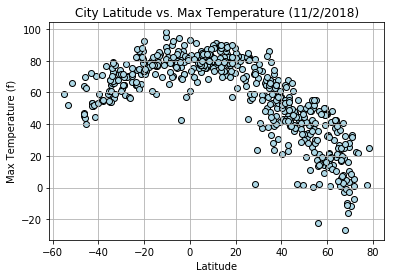

In [8]:
plt.scatter(Lat, MaxTemp, marker="o", facecolors ="lightblue", edgecolors = "black")

plt.grid(True)

plt.title("City Latitude vs. Max Temperature (11/2/2018)")

plt.ylabel("Max Temperature (f)")

plt.xlabel("Latitude")

plt.show

#### Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

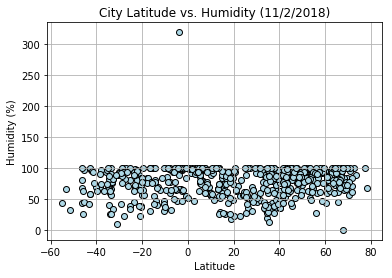

In [9]:
plt.scatter(Lat, Humidity, marker="o", facecolors ="lightblue", edgecolors = "black")

plt.grid(True)

plt.title("City Latitude vs. Humidity (11/2/2018)")

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

plt.show

#### Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

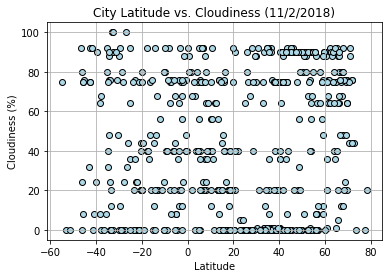

In [10]:
plt.scatter(Lat, Cloudiness, marker="o", facecolors ="lightblue", edgecolors = "black")

plt.grid(True)

plt.title("City Latitude vs. Cloudiness (11/2/2018)")

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.show

#### Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

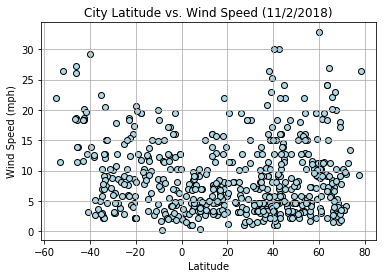

In [11]:
plt.scatter(Lat, WindSpeed, marker="o", facecolors ="lightblue", edgecolors = "black")

plt.grid(True)

plt.title("City Latitude vs. Wind Speed (11/2/2018)")

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Latitude")

plt.show